# plots for open reading
28 September 2018

In [1]:
import sys; sys.path.insert(0, '../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;
sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

ImportError: No module named ccqe_notebook_tools

In [2]:
pairtypes  = ['cosmic' ,'CC1p'    ]
labels     = ['Cosmic (data)' ,r'CC1p0$\pi$ (MC)']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]
fmts       = ['o'      ,'s']

In [3]:
versions['overlay date'] = '2018_09_25'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

285038 ccqe candidate pairs, 180092 in FV
74392 are 1mu-1p, 41.3%
55230 are other-pairs, 30.7%
155416 are cosmic, 86.3%
--------------------------------------------------------------
37228 are CC1p, 20.7%
I finished loading overlay samples. We have in total 285038 pairs
155416 cosmic pairs and 74392 mu-p pairs in overlay


In [4]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt no delta phi','Pt & delta phi']

In [5]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other-pairs,cosmic,CC1p
no cut,100.0%,26.1%,100.0%,13.1%,no cut,100.0% (74392),100.0% (55230),100.0% (155416),100.0% (37228)
Chi2Proton,62.3%,71.9%,67.2%,38.8%,Chi2Proton,62.3% (46312),17.7% (9754),5.4% (8327),67.2% (25016)
MatchedFlash,47.7%,80.5%,51.6%,43.6%,MatchedFlash,47.7% (35453),11.5% (6333),1.5% (2256),51.6% (19208)
length,43.2%,84.9%,47.3%,46.5%,length,43.2% (32166),6.9% (3838),1.2% (1874),47.3% (17623)
non-collinearity,39.8%,89.0%,45.1%,50.5%,non-collinearity,39.8% (29601),5.1% (2823),0.5% (839),45.1% (16796)
vertex activity,29.4%,90.4%,40.4%,62.1%,vertex activity,29.4% (21878),3.3% (1847),0.3% (467),40.4% (15034)
delta phi,20.3%,95.9%,31.8%,75.2%,delta phi,20.3% (15079),0.8% (461),0.1% (189),31.8% (11824)
Pt no delta phi,22.2%,93.2%,32.9%,69.3%,Pt no delta phi,22.2% (16494),1.7% (949),0.2% (256),32.9% (12261)
Pt & delta phi,16.7%,97.0%,26.9%,78.4%,Pt & delta phi,16.7% (12399),0.5% (276),0.1% (104),26.9% (10020)


# Figures

In [6]:
#---------------------------------------------------------------------------------------------
# Aug-1, 2017
def plot_feature_pairs(cut_name=None,yscale=1,
                       var=None,x_label='',mul=1,y_label='normalized counts [a.u.]',
                       bins=None,
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
        sample = reducedOverlay[cut_name][pair_type]
        if len(sample) < 10: continue
#         h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        h,bins = np.histogram(mul*sample[var],bins=bins,normed=1)
        h = h*yscale
        mid = 0.5*(bins[1:]+bins[:-1])
        ax.step(mid,h,where='mid',color=color,linewidth=3)
        text_colors.append(color)
        p = plt.plot([0,0],[0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h: max_h=np.max(h)        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,do_add_grid=True
             ,xlim=(np.min(bins),np.max(bins))
             ,ylim=(0,1.05*max_h)
            )
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------

# $\chi^2_{p-hypothesis}$

In [11]:
Chi2Proton_muCandidate_min=80
Chi2Proton_muCandidate_max=1000
Chi2Proton_pCandidate_min=0
Chi2Proton_pCandidate_max=30

155416 pairs in cosmic
37228 pairs in CC1p


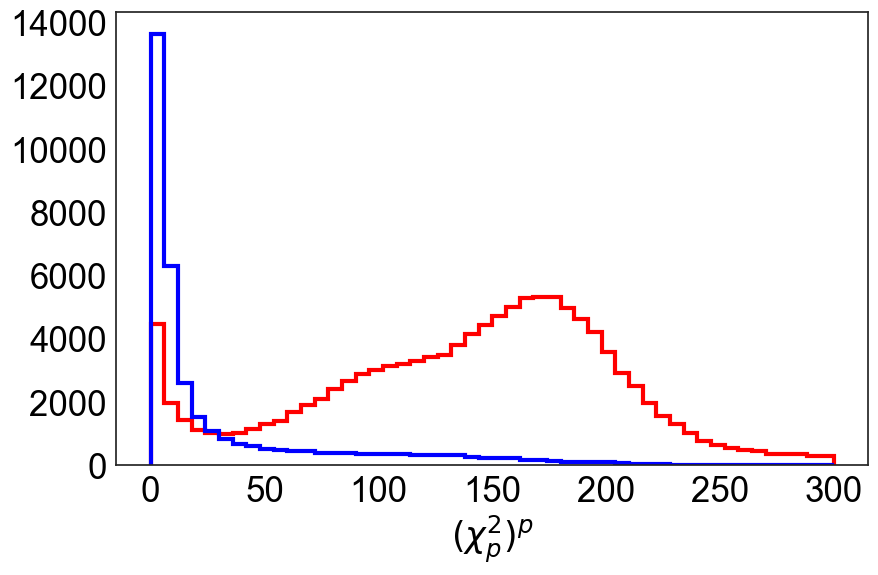

In [14]:
var = 'pidcali_Chi2ProtonYplane_pCandidate'
bins = linspace(0.01,300,51)
fig,ax=plt.subplots(figsize=(9.7,6))
for pairtype,color in zip(pairtypes,colors):
    sam = reducedOverlay['no cut'][pairtype]
    plt.hist(sam[var],bins=bins,histtype='step',linewidth=3,color=color)
set_axes(ax,r'$(\chi^2_{p})^{p}$','')

In [15]:
sam.MatchedFlash_YZdistance

,Unnamed: 0,run,subrun,event,vertex_id,x,y,z,track_id,l_muCandidate,...,MatchedFlash_Zdistance,MatchedFlash_YZdistance,MatchedFlash_TotalPE,MatchedFlash_Time,MatchedFlash_Score,isBrokenTrajectory,1mu-1p,CC1p,other-pairs,cosmic
8,8,7012,1610,80531,0,128.4390,-27.881000,856.2970,0;2;,134.94700,...,-9.76465,26.1349,1456.920,4.24625,5.898730e-01,0,1,1,0,0
9,9,7012,1610,80532,0,124.0260,-72.914900,251.4560,0;1;,322.72800,...,-95.57490,117.0760,1954.420,4.63625,7.665530e-01,0,1,1,0,0
12,12,7012,1610,80547,0,179.1250,-67.973800,272.4500,1;4;,75.01330,...,-39.10600,70.7865,1994.210,4.15188,1.030400e-03,0,1,1,0,0
22,22,7008,1216,60827,0,63.5294,-84.169500,1019.2000,1;3;,17.99610,...,94.95440,115.7010,503.299,4.96625,8.987890e-07,0,1,1,0,0
26,26,7008,1216,60835,0,96.8175,-98.961600,337.1730,0;1;,50.37880,...,338.17300,352.0760,-1.000,-1.00000,-1.000000e+00,0,1,1,0,0
27,27,7008,1216,60838,0,129.0970,37.687900,377.9860,1;2;,87.52380,...,-6.53220,30.3081,871.117,4.42625,5.247410e-02,0,1,1,0,0
30,30,7008,1216,60845,0,229.5720,11.069300,315.9900,0;5;,407.00400,...,316.99000,317.2200,-1.000,-1.00000,-1.000000e+00,0,1,1,0,0
37,37,7001,745,37254,0,224.4380,69.894600,915.3430,0;3;,140.48200,...,29.51750,68.4803,524.116,3.94625,2.118630e-02,0,1,1,0,0
51,51,7001,745,37292,0,197.1390,67.518700,825.5030,0;2;,236.82500,...,-65.18310,85.8578,1367.060,4.72625,6.362430e-01,0,1,1,0,0
53,53,7001,745,37295,0,154.8900,64.075200,86.4216,2;4;,164.85500,...,-96.42870,113.7270,579.573,3.63812,8.210830e-01,0,1,1,0,0


# optical filtering

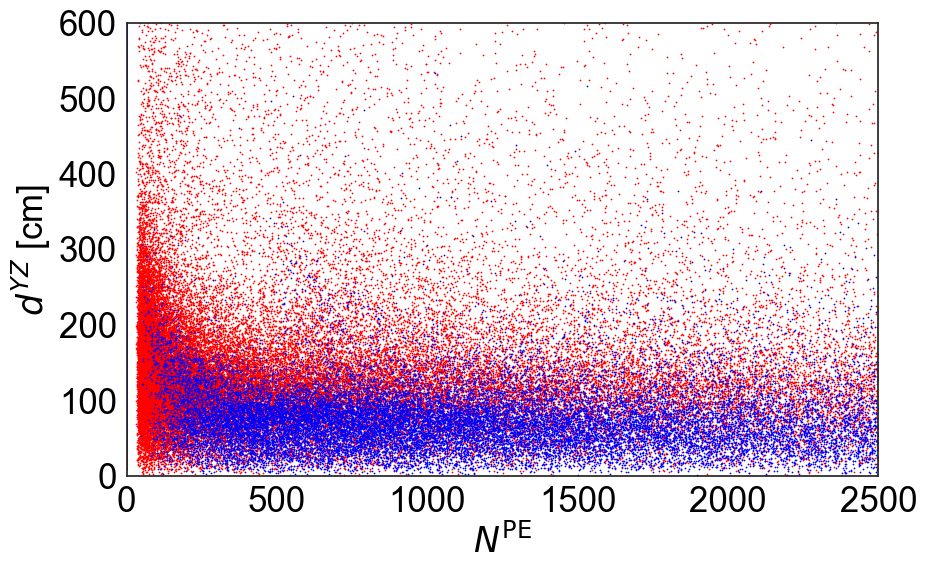

In [25]:
fig,ax=plt.subplots(figsize=(9.7,6))
for i,(pairtype,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
    sam = reducedOverlay['no cut'][pairtype]
    sam = sam[ (sam['MatchedFlash_TotalPE']<5000) &(sam['MatchedFlash_YZdistance']<1000) ]
    ax.scatter(sam['MatchedFlash_TotalPE'],sam['MatchedFlash_YZdistance'],
               color=color, s=0.8)
set_axes(ax,r'$N^{\mathrm{PE}}$',r'$d^{YZ}$ [cm]',xlim=(0.1,2500),ylim=(0,600))

# length

In [ ]:
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$\ell_{p}$ [cm]',r'$\ell_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color,s) in enumerate(zip(pairtypes,labels,cmaps,colors,[15,3])):
    print 'pair_type:',pair_type
    sample = reducedOverlay['MatchedFlash'][pair_type]
    fig = plt.figure(figsize=(12.944,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(label,fontsize=65,y=1.02,color=color)
    ax.scatter(sample['l_pCandidate'], sample['l_muCandidate'],color=color,s=s)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label,fontsize=40,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    plt.tight_layout()
    fig.savefig(figures_path+'l_mu_p_after_dEdx_and_PMT_cuts_%d.pdf'%i)

# non collinearity

In [ ]:
bins=np.linspace(0,180,60)
x_label=r'$\theta_{12}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
    RGB = (1,0,0) if color=='red' else (0,0,1) if color=='blue' else (0,0,0)
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)    
    set_axes(ax,x_label=x_label if i>0 else ''
             , y_label='counts'# if i==0 else ''
             ,fontsize=45
             ,xticks=[30,90,150],yticks=[10,100,1000]
             ,ticks_color='black',do_add_grid=True) 
    # change frame color
    #     for spine in ax.spines.values(): spine.set_edgecolor(color) 
    for cut_name,s_label,alpha in zip(['no cut','Chi2Proton','MatchedFlash','length'] 
                                      ,['no cut','$\chi^2_{p}$ cut',r'PMT cut',r'$l_\mu>l_p$ cut']
                                      ,[0.2,0.4,0.7,1]):
        sample = reducedOverlay[cut_name][pair_type]
        theta = sample['theta_12'] 
        plt.hist(theta,bins=bins,color=color,histtype='stepfilled'
                 ,label=s_label
                 ,linewidth=3, fc=(RGB[0],RGB[1],RGB[2],alpha)) #,normed=1
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i==0:  ax.legend(fontsize=34,loc='upper center')    
    plt.plot([35,35],ax.get_ylim(),'-'
             ,[145,145],ax.get_ylim(),'-'
             ,color='black',linewidth=3)

    plt.subplots_adjust(right=0.5)
    plt.tight_layout()
    fig.savefig(figures_path+'theta_12_before_after_dEdx_PMT_length_cuts_%d.pdf'%i)

In [ ]:
# after cuts on PIDa and tracks-length
ax,leg=plot_cut_samples(reduced_cut_name='length',markers_size=5
                        ,cut_var ='theta_12'
                        ,do_add_legend=False, legend_loc='bbox'
                        ,cut_type= 'symmetric',fontsize=30,figsize=(12,6)
                        ,x_label = r'$\delta \theta_{12}$ [deg.]'
                        ,xcenter=90, xmin=0., xmax=90 , Nbins=100
                        ,do_add_texts=True,xy_cosmic_text=(30,5),xy_MC_text=(28,60))
plt.text(2,90,r'cut on $\pi/2 \pm \delta \theta_{12}$',fontsize=35)
plt.plot([55,55],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'theta_12_cuts_after_dEdx_PMT_length_cuts.pdf',bbox_inches='tight')

# Kinematical cuts

In [ ]:
from scipy.optimize import leastsq
from scipy.stats import norm                                                                                                                                                                                                                                                                                                                                                                                                                   
from scipy.optimize import curve_fit

# $\Delta \phi$

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pairtypes[1]; label = labels[1]; color = colors[1]
sample = reducedOverlay['vertex activity'][pair_type]
set_axes(ax,r'$\Delta \phi^{\mathrm{gen.}}-\Delta \phi^{\mathrm{rec.}}$ [deg.]' , 'Events per bin [a.u.]', fontsize=30,do_add_grid=True
             ,xticks=[-50,-25,0,25,50])

truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
h,bins = np.histogram(sample['truth_delta_phi'] - sample['delta_phi'],bins=np.linspace(-50,50,51),normed=1)
mid = 0.5*(bins[1:]+bins[:-1])    
# h,bins,_=ax.hist(sample['truth_delta_phi'] - sample['delta_phi'],bins=np.linspace(-50,50,51),color=color,normed=1);
h = h*100
ax.bar(mid,h,width=mid[1]-mid[0])
h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-50,50,51),normed=1);
xdata = mid 
ydata = h_truncated
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
mu,sigma = pars
mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
x_fit = linspace(np.min(mid),np.max(mid),1000)
ax.plot(x_fit, 100*norm.pdf(x_fit,*pars), 'k--',linewidth = 2, label='fit before')    
print r'$\mu=%.3f \pm %.3f, \sigma=%.3f \pm %.3f$'%(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ]))
plt.text(9,0.7*np.max(h),r'$\sigma=%.1f \pm %.1f$'%( pars[1], np.sqrt(cov[1,1 ]))+'$^0$',color=color,fontsize=40)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_RdQ_cut.pdf')

In [ ]:
ax=plot_feature_pairs(cut_name='vertex activity',y_label='Events per bin [a.u.]',yscale=1000
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),fontsize=30,legend_fontsize=30)
plt.plot([145,145],[0,0.03],'-',[215,215],[0,0.03],'-',color='black')
ax.set_yticks([0,10,20,30])
plt.savefig(figures_path+'DeltaPhi_after_RdQ_cut.pdf')

In [ ]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity'
                        ,do_add_legend=False,markers_size=5
                        ,legend_loc='lower right'
                        ,cut_var ='delta_phi',cut_type= 'symmetric'
                        ,x_label = r'$\delta \Delta \phi$ around $\pi$ [deg.]'
                        ,xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(90,25),xy_MC_text=(60,75))
plt.plot([35,35],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts_after_RdQ_cut.pdf', bbox_inches='tight')

# $p_t$

In [ ]:
bins=np.linspace(-0.8,0.8,21)
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reducedOverlay['vertex activity'][pair_type]
set_axes(ax,r'$p_{t}^{\mathrm{gen.}}-p_{t}^{\mathrm{rec.}}$ [GeV/c]' ,  'Events per bin [a.u.]', fontsize=25,do_add_grid=True
             ,xticks=[-0.60,-0.3,0,0.3,0.6])

truncated = sample[np.abs(sample['truth_Pt'] - sample['reco_Pt'])<0.35]
delta_truncated = (truncated['truth_Pt'] - truncated['reco_Pt'])
h,bins,_=ax.hist(sample['truth_Pt'] - sample['reco_Pt'],bins=bins,color=color,normed=1);
mid = 0.5*(bins[1:]+bins[:-1])    
# h = h*100
ax.bar(mid,h,width=mid[1]-mid[0])
h_truncated,bins = np.histogram( delta_truncated , bins =bins,normed=1);
mid = 0.5*(bins[1:]+bins[:-1])    
xdata = mid
ydata = h_truncated
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
mu,sigma = pars
mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
x_fit = linspace(np.min(mid),np.max(mid),1000)
ax.plot(x_fit, norm.pdf(x_fit,*pars), 'k--',linewidth = 2)    
print r'$\mu=%.3f \pm %.3f, \sigma=%.3f \pm %.3f$'%(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ]))
plt.text(0.12,0.9*np.max(h),'$\sigma=%.3f$ \n   $\\pm %.3f$'%( pars[1], np.sqrt(cov[1,1 ]))+' GeV/c',color=color,fontsize=32)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_RdQ_cut.pdf')

In [ ]:
ax=plot_feature_pairs(cut_name='vertex activity',var='reco_Pt',x_label=r'$p_{t}$ [GeV/c]' ,y_label='Events per bin [a.u.]'                             
                      ,bins=np.linspace(0,1.1,35)                              
                      ,do_add_legend=True
                      ,figsize=(12,8),fontsize=30,legend_fontsize=30,legend_loc='upper right')
ax.plot([0.35,0.35],[0,5.5],'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.set_xticks([0,0.3,0.6,0.9]);ax.set_yticks([1,2,3])
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_RdQ_cut.pdf')

In [ ]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity',do_add_legend=False,legend_loc='lower right'
                        ,legend_fontsize=25,markers_size=5                
                     ,cut_var ='reco_Pt', cut_type= 'max'
                     ,x_label = 'maximal $p_{t}$ [GeV/c]'
                     ,xmin=0, xmax=1.2 , Nbins=100,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(0.45,20),xy_MC_text=(0.03,90));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts_after_RdQ_cut.pdf', bbox_inches='tight')

# arxiv

In [ ]:
# plt.hist(reducedOverlay['no cut']['cosmic']['delta_phi'],bins=np.linspace(0,360,60));
ax=plot_feature_pairs(cut_name='no cut',y_label='Events per bin [a.u.]',yscale=1000
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),fontsize=30,legend_fontsize=30)
ax.set_yticks([0,10,20,30])

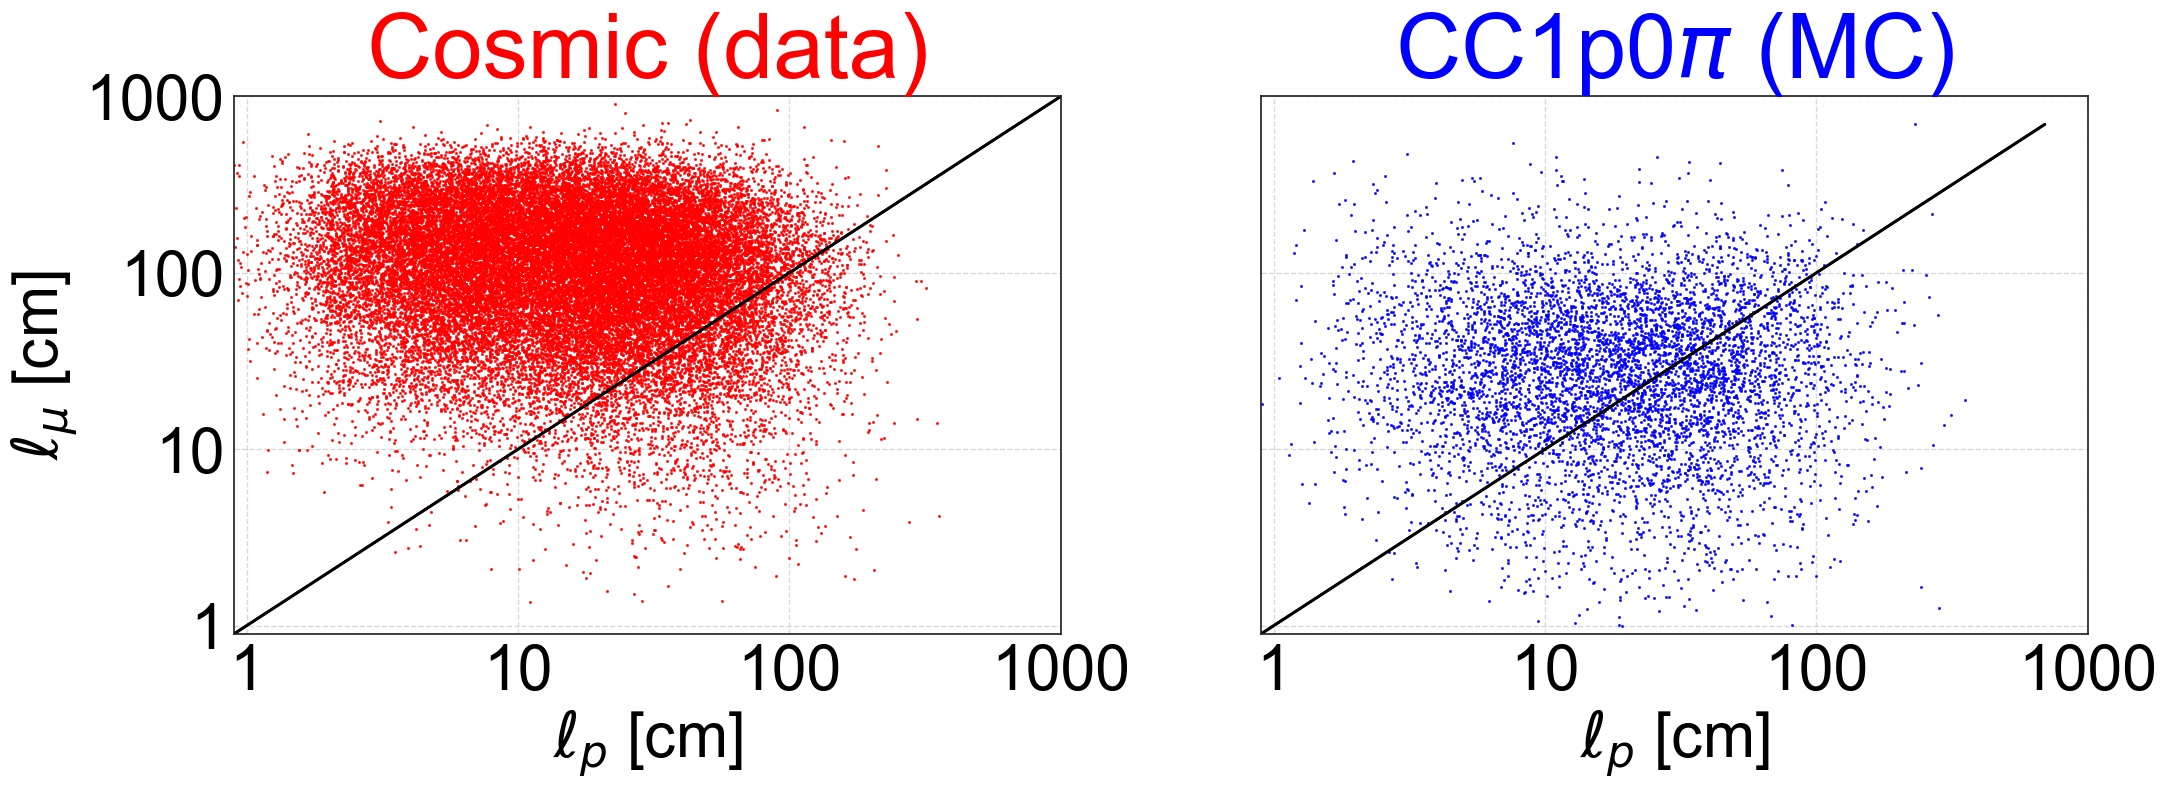

In [15]:
fig = plt.figure(figsize=(22,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$\ell_{p}$ [cm]',r'$\ell_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reducedOverlay['MatchedFlash'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=65,y=1.02,color=color)
    ax.scatter(sample['l_pCandidate'], sample['l_muCandidate'],color=color,s=3)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.subplots_adjust(right=0.5)
plt.tight_layout()
# fig.savefig(figures_path+'l_mu_p_after_dEdx_and_PMT_cuts.pdf')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4384: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins == 'log':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4384: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if bins == 'log':


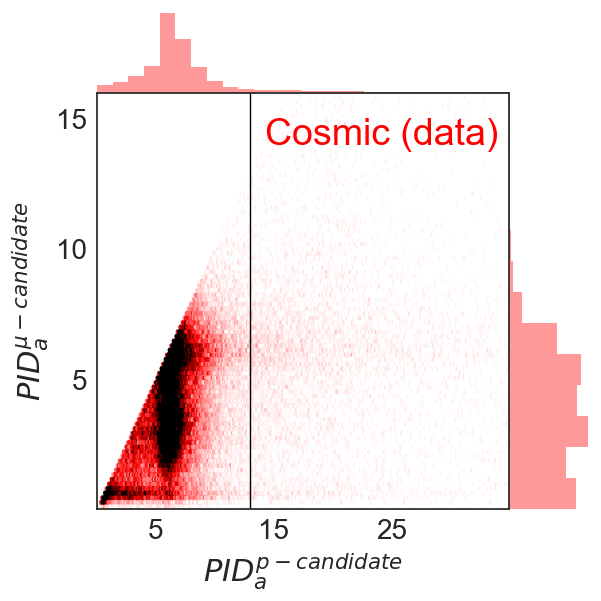

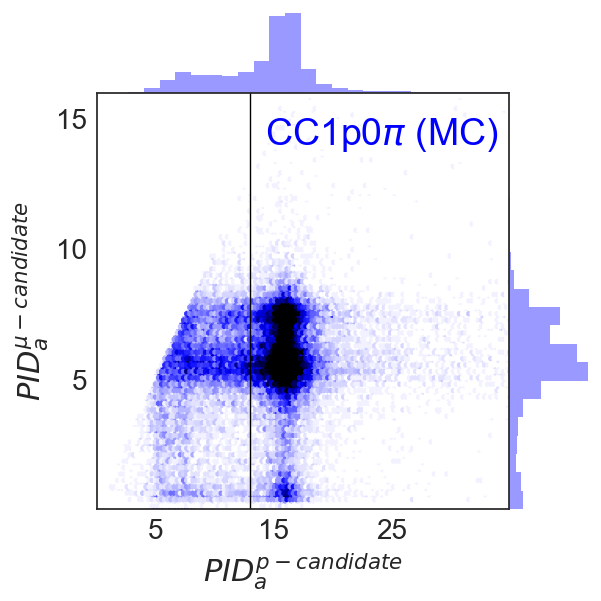

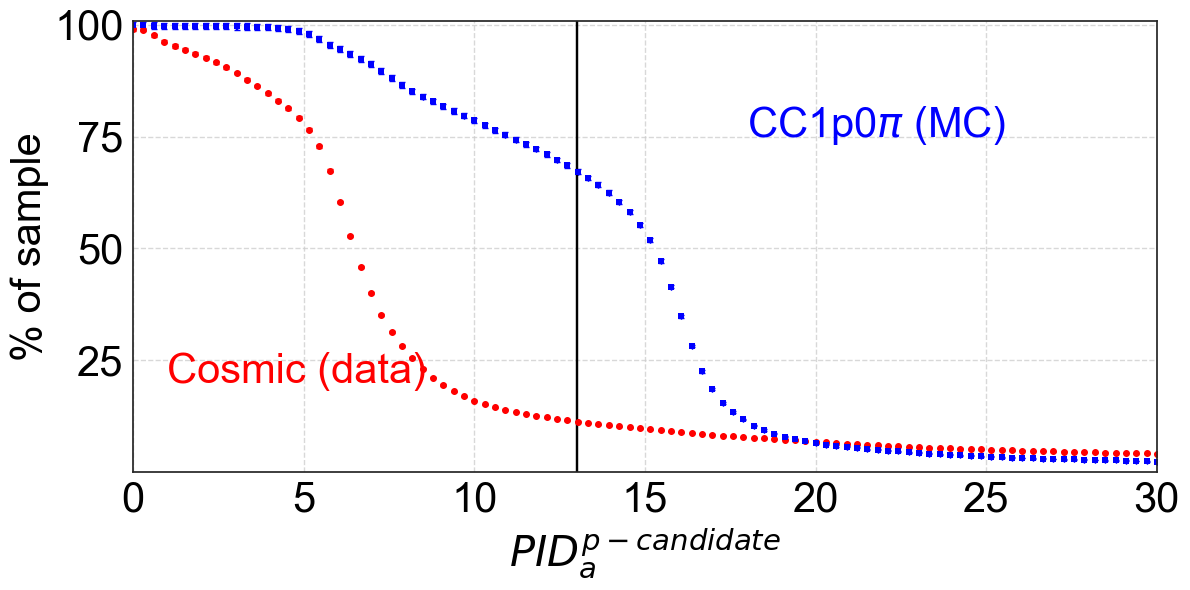

In [11]:
PIDaCut = 13
for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)): 
    sample = reducedOverlay['no cut'][pair_type]
    sample = sample[(sample['pidcali_PIDaYplane_pCandidate']>-40)&(sample['pidcali_PIDaYplane_pCandidate']<40)
                    &(sample['pidcali_PIDaYplane_muCandidate']>-40) &(sample['pidcali_PIDaYplane_muCandidate']<40)]    
#     plt.hist(sample['pidcali_PIDaYplane_pCandidate'],bins=np.linspace(0,35,35))
    g = sns.jointplot(sample['pidcali_PIDaYplane_pCandidate'], sample['pidcali_PIDaYplane_muCandidate']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,bins=np.linspace(0,35,35)
                      ,gridsize=350 if i==0 else 150
                      ,xlim=(0,35)
                      ,ylim=(0,16)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':30}
                     )
    g.set_axis_labels(r'$PID_{a}^{p-candidate}$',r'$PID_{a}^{\mu-candidate}$')
    g.ax_joint.set_xticks([5,15,25]); g.ax_joint.set_yticks([5,10,15])
    g.ax_joint.plot([PIDaCut,PIDaCut],g.ax_joint.get_ylim(),'-',color='black',linewidth=1)
    g.fig.text(0.43,0.75,label, color=color, fontsize=27) #add text
# impact of PIDa cut
ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,figsize=(12,6)
                        ,cut_var ='pidcali_PIDaYplane_pCandidate'
                        ,cut_type= 'min',fontsize=30
                        ,x_label = r'$PID_{a}^{p-candidate}$'
                        ,xmin=0, xmax=30 , Nbins=100
                        ,do_add_legend=False,legend_loc='upper right'
                        ,do_add_texts=True,xy_cosmic_text=(1,20),xy_MC_text=(18,75))
plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black')